<a href="https://colab.research.google.com/github/HWatanuki/COVID-19/blob/master/ead_1_1_HMW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IFSP Campinas** <br/>
**D1INT: Introdução à Ciênciad de Dados (2022.1)** <br/>


Profs: Everton Silva <br/>

**Notebook produzido/adaptado de**: https://github.com/prof-samuka-IFSP/IFSP-CMP-D1AED-2022.1

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike

## Pipeline de Ciência de Dados
<a><img alt="Pipeline de Ciência de Dados" src="./pipeline - ciência de dados.png" width="800" height="600" /></a>

## Análise Exploratória de Dados

Com nossa base de dados limpa, vamos explorar nossos dados :) <br/>

A **Análise Exploratória de Dados (EDA)** é uma etapa do pipeline em ciência de dados utilizada para entender o conjunto de dados facilmente, encontrar padrões, identificar outliers e explorar a relação entre variáveis usando técnicas não gráficas e gráficas. Essa etapa também pode ser útil para identificarmos quais atributos devem ser considerados para uso em nosso modelo de aprendizado de máquina (seleção de atributos).

Neste notebook, realizaremos uma **Análise Exploratória de Dados** em um conjunto de dados sobre aplicativos da Google Play Store. Nosso objetivo é responder algumas perguntas e hipóteses sobre o dataset. Para isso, analisaremos as variáveis do dataset em diferentes cenários, utilizando um ferramental que envolve a manipulação de dados, estatísticas descritivas e visualizações. <br/>

Como suporte para visualização:
- https://datavizcatalogue.com/
- https://www.python-graph-gallery.com/

## Importações

In [3]:
# pacotes usados neste notebook
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Dataset

**Dataset**: Google Play Store Apps: https://www.kaggle.com/lava18/google-play-store-apps <br/>

Este dataset contém dados sobre aplicativos da Google Play Store. <br/>
Cada *observação (registro/linha)* consiste de informações de um app, tais como categoria, avaliação, tamanho, entre outros.

### 1.1 Importando o Dataset

In [6]:
df = pd.read_csv("/content/sample_data/googleplaystore_preprocessado.csv")

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,First_Genre,Sec_Genre
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,2018-01-07,1.0.0,4.0.3 and up,Art & Design,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,2018-01-15,2.0.0,4.0.3 and up,Art & Design,Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000,Free,0.0,Everyone,2018-06-20,1.1,4.4 and up,Art & Design,Creativity


### 1.2 Informações sobre o conjunto de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9659 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  First_Genre     9659 non-null   object 
 13  Sec_Genre       9659 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.0+ MB


O dataset possui **9658** registros/observações/linhas e **13** atributos/variáveis/colunas. <br/>
Alguns atributos possuem atributos com **valores ausente/faltantes(null)** (p. ex., _'Rating'_). <br/>

<h2>2. Análise Exploratória de Dados</h2>

Vamos dividir nossa análise em três tópicos: (1)análise univariada, (2) análise bivariada e (3) análise multivariadas.
<hr/>

## 2.1 Análise Univariada

O objetivo da análise univariada é entender a distribuição de valores para uma única variável.
Podemos realizar análise univariada com 3 opções:
- Estatísticas resumidas
- Tabela de Distribuições de Frequência
- Gráficos (Boxplot, Histograma, Barplot, Pie Chart)

<hr/>

In [ ]:
# estilos padrão para os plots/visualizações
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['axes.titlesize']= 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

base_color = '#6495ED'

### 2.1.1 Varáveis númericas

### **RATING**

In [ ]:
stats = df.describe()
stats

,Rating,Reviews,Size,Installs,Price
count,8196.000000,9.659000e+03,8.432000e+03,9.659000e+03,9659.000000
mean,4.173243,2.165926e+05,2.039529e+07,7.777507e+06,1.099299
std,0.536625,1.831320e+06,2.182754e+07,5.375828e+07,16.852152
min,1.000000,0.000000e+00,8.500000e+03,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,4.600000e+06,1.000000e+03,0.000000
50%,4.300000,9.670000e+02,1.200000e+07,1.000000e+05,0.000000
75%,4.500000,2.940100e+04,2.800000e+07,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+08,1.000000e+09,400.000000


In [ ]:
df['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [ ]:
print(f"A nota média (avaliação) dos aplicativos é de {stats.loc['mean', 'Rating']:.2f} +- {stats.loc['std', 'Rating']:.2f}")
print(f"A mediana das avaliações é de {stats.loc['50%', 'Rating']}")

A nota média (avaliação) dos aplicativos é de 4.17 +- 0.54
A mediana das avaliações é de 4.3


Note que a **média** e a **mediana** não estão muito longe e que o **desvio padrão** não é tão alto, mesmo com uma escala tão baixa com é a das avaliações (de 0 a 5). Tudo isso indica (em números) que a dispersão de notas/avaliações dos aplitativos não é tão grande.

**HISTOGRAMA**

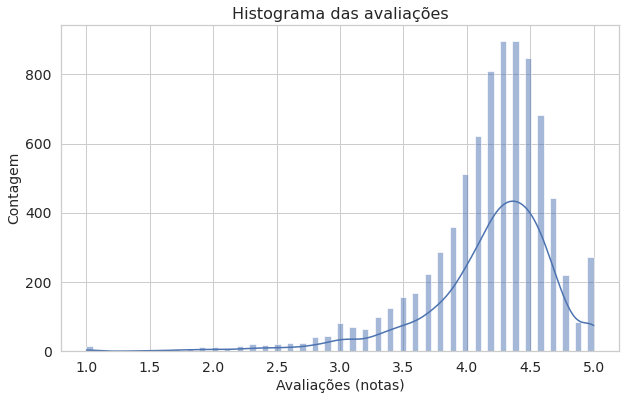

In [ ]:
sns.histplot(df['Rating'], kde=True)
plt.xlabel('Avaliações (notas)')
plt.ylabel('Contagem')
plt.title('Histograma das avaliações')
plt.show()

A **distribuição das avaliações** tem semelhanças com um _distribuição normal_ enviesada à esquerda (skewed left distribution). <br/>

Apenas olhando este gráfico podemos notar que a grande maioria das avaliações estão no intervalo entre 4.0 e 5.0.

**BOXPLOT**

In [ ]:
stats[['Rating']]

,Rating
count,8196.000000
mean,4.173243
std,0.536625
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


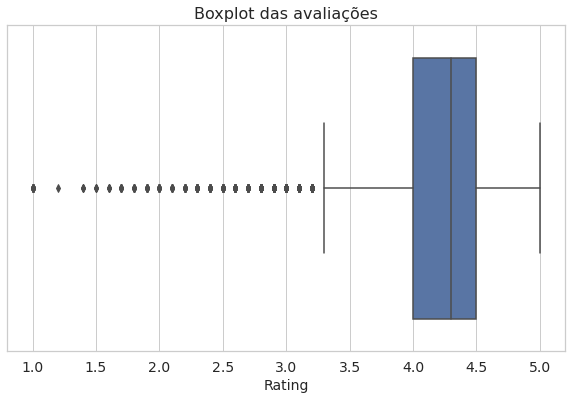

In [ ]:
sns.boxplot(data=df, x='Rating')
plt.title('Boxplot das avaliações')
plt.show()

Pelo boxplot, é possível enxergar que 50% dos dados estão entre as avaliações 4.0 (Q1) e 4.5 (Q3), confirmando os resultados vindos do método `.describe()`.

Por outro lado, o boxplot mostra que os aplicativos com avaliações _menores do que ~3.25_ são ***outliers***. <br/>
Entretanto, é comum termos aplicativos mal avaliados. Assim sendo, a inclusão destes aplicativos na análise é relevante.

**VIOLINPLOT**

Text(0.5, 1.0, 'Violin Plot das avaliações')

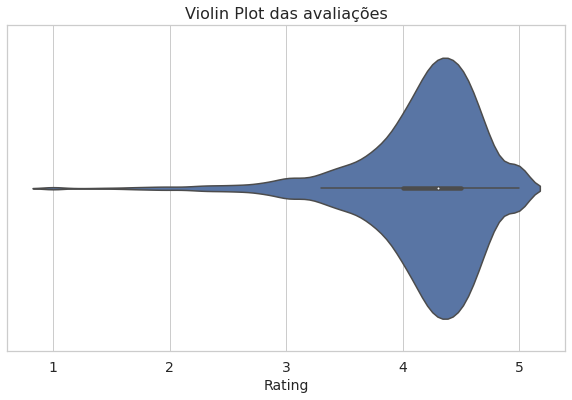

In [ ]:
sns.violinplot(data=df, x='Rating')
plt.title('Violin Plot das avaliações')

O _violin plot_ nos dá uma noção mais precisa de como os dados estão distribuídos, principalmente, entre os quartis.

**OUTLIERS**

<br/>

O boxplot do seaborn identifica outliers usando o método de detecção via IQR (`Inter Quantile Range`) e considera como **outlier** qualquer valor fora do intervalo **\[Q1 - 1.5\*IQR, Q3 + 1.5\*IQR\]**. Podemos controlar o fator **1.5** alterando o parâmetro `whis`. <br/>

Se quisermos, por exemplo, que o boxplot não tenha _outliers_, basta passar um valor alto para o `whis`.

In [ ]:
Q1 = df['Rating'].quantile(0.25)
Q3 = df['Rating'].quantile(0.75)
IQR = Q3 - Q1 #Inter Quantile Range
print(f'Q1: {Q1} \n'
      f'Q3: {Q3} \n'
      f'IQR: {IQR} ')

Q1: 4.0 
Q3: 4.5 
IQR: 0.5 


In [ ]:
cond = (df['Rating'] < Q1-1.5 * IQR) | (df['Rating'] > Q3+1.5* IQR)
qtd_apps_outliers = df.loc[cond]
qtd_apps_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,First_Genre,Sec_Genre
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55.0,2700000.0,5000,Free,0.0,Everyone,2018-06-06,Varies with device,4.2 and up,Art & Design,Art & Design
87,RST - Sale of cars on the PCT,AUTO_AND_VEHICLES,3.2,250.0,1100000.0,100000,Free,0.0,Everyone,2018-04-27,1.4,4.0.3 and up,Auto & Vehicles,Auto & Vehicles
209,Plugin:AOT v5.0,BUSINESS,3.1,4034.0,23000.0,100000,Free,0.0,Everyone,2015-09-11,3.0.1.11 (Build 311),2.2 and up,Business,Business
275,comico Popular Original Cartoon Updated Everyd...,COMICS,3.2,93965.0,15000000.0,5000000,Free,0.0,Teen,2018-07-03,6.3.0,4.0.3 and up,Comics,Comics
276,Daily Manga - Comic & Webtoon,COMICS,3.2,1446.0,7100000.0,100000,Free,0.0,Mature 17+,2018-05-18,1.0,4.0.3 and up,Comics,Comics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9455,Florida Blue,HEALTH_AND_FITNESS,3.2,499.0,34000000.0,100000,Free,0.0,Everyone,2018-07-10,4.2.1,7.0 and up,Health & Fitness,Health & Fitness
9488,SB · FN 1870 Mobile Banking,FINANCE,2.9,139.0,3300000.0,10000,Free,0.0,Everyone,2017-06-19,3.0.5,4.0 and up,Finance,Finance
9500,Pint - FN Theme,PERSONALIZATION,2.5,6.0,234000.0,100,Free,0.0,Everyone,2013-08-10,1.0,2.2 and up,Personalization,Personalization
9576,Fisher-Price® Smart Connect™,TOOLS,2.7,422.0,72000000.0,50000,Free,0.0,Everyone,2018-02-23,2.4.1,4.4 and up,Tools,Tools


In [ ]:
num_rows_no_outliers = df.loc[~df["Rating"].isna()].shape[0]
print(f'A quantidade de apps considerados "outliers" por suas avaliações é de {qtd_apps_outliers.shape[0]} '
      f'({qtd_apps_outliers.shape[0] * 100 / num_rows_no_outliers:.2f}%) de um total de {num_rows_no_outliers} apps.')

A quantidade de apps considerados "outliers" por suas avaliações é de 492 (6.00%) de um total de 8196 apps.


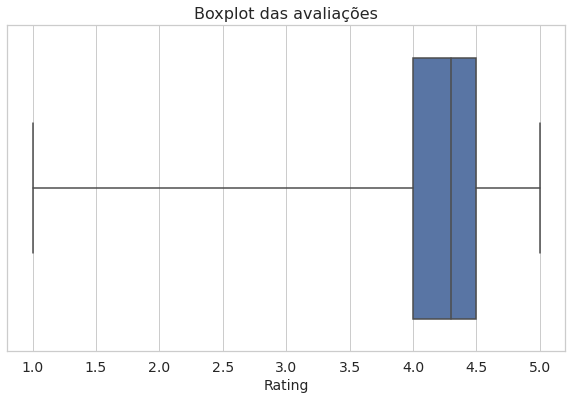

In [ ]:
sns.boxplot(data=df, x='Rating', whis=6)
plt.title('Boxplot das avaliações')
plt.show()

### **REVIEWS**

In [ ]:
df['Reviews'].describe()

count    9.659000e+03
mean     2.165926e+05
std      1.831320e+06
min      0.000000e+00
25%      2.500000e+01
50%      9.670000e+02
75%      2.940100e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [ ]:
print(f"A média de reviews dos aplicativos é de {stats.loc['mean', 'Reviews']:.2f} +- {stats.loc['std', 'Reviews']:.2f}.")
print(f"A mediana das reviews é de {stats.loc['50%', 'Reviews']}")

A média de reviews dos aplicativos é de 216592.56 +- 1831319.57.
A mediana das reviews é de 967.0


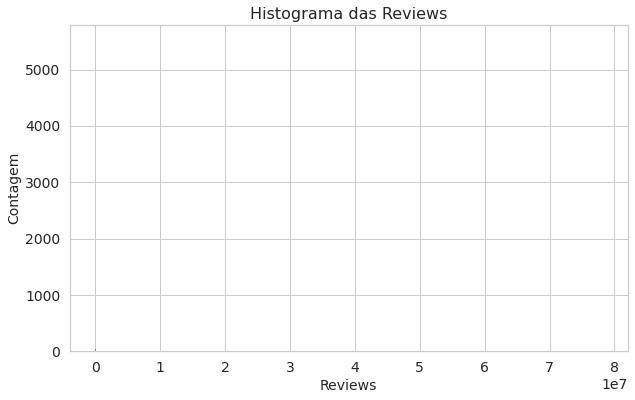

In [ ]:
sns.histplot(df['Reviews'])
plt.xlabel('Reviews')
plt.ylabel('Contagem')
plt.title('Histograma das Reviews')
plt.show()

Nada aparece pois existem muitos outliers.

**OUTLIERS**

In [ ]:
Q1 = df['Reviews'].quantile(0.25)
Q3 = df['Reviews'].quantile(0.75)
IQR = Q3 - Q1 #Inter Quantile Range
print(f'Q1: {Q1} \n'
      f'Q3: {Q3} \n'
      f'IQR: {IQR} ')

Q1: 25.0 
Q3: 29401.0 
IQR: 29376.0 


In [ ]:
cond = (df['Reviews'] < Q1-1.5 * IQR) | (df['Reviews'] > Q3+1.5* IQR)
qtd_apps_outliers = df.loc[cond]
qtd_apps_outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,First_Genre,Sec_Genre
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000,Free,0.0,Everyone,2018-08-01,1.2.4,4.0.3 and up,Art & Design,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,2018-06-08,Varies with device,4.2 and up,Art & Design,Art & Design
18,FlipaClip - Cartoon animation,ART_AND_DESIGN,4.3,194216.0,39000000.0,5000000,Free,0.0,Everyone,2018-08-03,2.2.5,4.0.3 and up,Art & Design,Art & Design
19,ibis Paint X,ART_AND_DESIGN,4.6,224399.0,31000000.0,10000000,Free,0.0,Everyone,2018-07-30,5.5.4,4.1 and up,Art & Design,Art & Design
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,NaN,10000000,Free,0.0,Everyone,2018-07-30,Varies with device,Varies with device,Art & Design,Art & Design
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9599,Modern Strike Online,GAME,4.3,834117.0,44000000.0,10000000,Free,0.0,Teen,2018-07-30,1.25.4,4.1 and up,Action,Action
9602,Big Hunter,GAME,4.3,245455.0,84000000.0,10000000,Free,0.0,Everyone 10+,2018-05-31,2.8.6,4.0 and up,Action,Action
9627,Castle Clash: RPG War and Strategy FR,FAMILY,4.7,376223.0,24000000.0,1000000,Free,0.0,Everyone,2018-07-18,1.4.2,4.1 and up,Strategy,Strategy
9644,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486.0,NaN,5000000,Free,0.0,Mature 17+,2018-03-23,Varies with device,Varies with device,Social,Social


In [ ]:
num_rows_no_outliers = df.loc[~df["Reviews"].isna()].shape[0]
print(f'A quantidade de apps considerados "outliers" por suas reviews é de {qtd_apps_outliers.shape[0]} '
      f'({qtd_apps_outliers.shape[0] * 100 / num_rows_no_outliers:.2f}%) de um total de {num_rows_no_outliers} apps.')

A quantidade de apps considerados "outliers" por suas reviews é de 1656 (17.14%) de um total de 9659 apps.


**BOXPLOT**

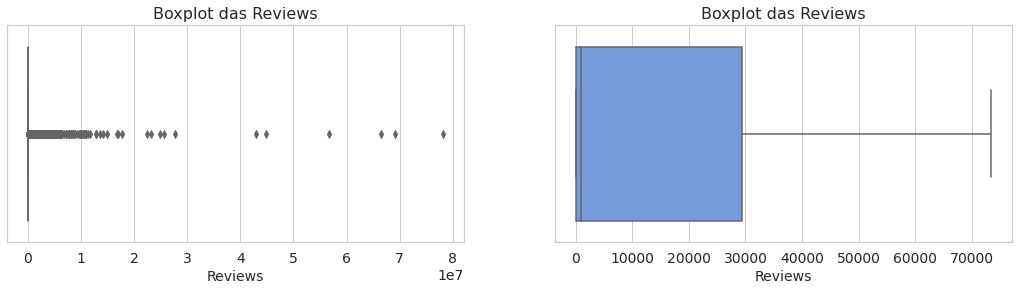

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize = (18, 4))
sns.boxplot(data=df, x='Reviews', color=base_color, ax=ax1)
sns.boxplot(data=df, x='Reviews', color=base_color, ax=ax2, showfliers=False)
ax1.set_title('Boxplot das Reviews')
ax2.set_title('Boxplot das Reviews')
plt.show()

Pelo boxplot, é possível perceber que, sem os `outliers`, 50% dos apps possuem entre 0 (Q1) e 30e+3 (Q3) reviews. <br/>
Quanto estivermos preparando o conjunto de dados para treinar um modelo de ML, podemos considerar a remoção desses outliers, embora faça parte da realidade dos apps.

**HISTOGRAMA**

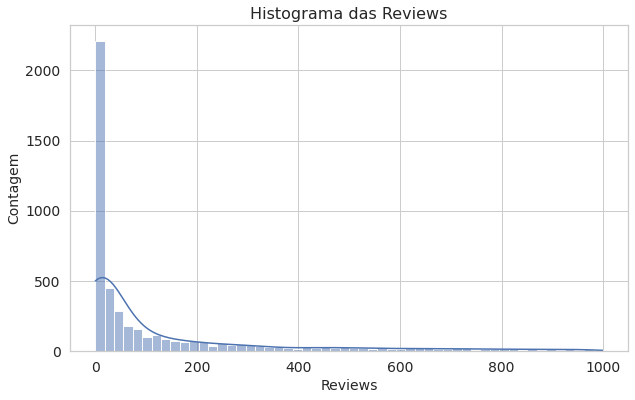

In [ ]:
cond = (df['Reviews'] < Q1-1.5* IQR) | (df['Reviews'] > Q3+1.5* IQR)
cond = df['Reviews'] <= 1e+3
sns.histplot(df.loc[cond,'Reviews'], kde=True)
plt.xlabel('Reviews')
plt.ylabel('Contagem')
plt.title('Histograma das Reviews')
plt.show()

### PRICE

In [ ]:
df['Price'].describe()

count    9659.000000
mean        1.099299
std        16.852152
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price, dtype: float64

In [ ]:
print(f"A média de preço dos aplicativos é de {stats.loc['mean', 'Price']:.2f} +- {stats.loc['std', 'Price']:.2f}.")
print(f"A mediana dos preços é de {stats.loc['50%', 'Price']}.")

A média de preço dos aplicativos é de 1.10 +- 16.85.
A mediana dos preços é de 0.0.


In [ ]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1 #Inter Quantile Range
print(f'Q1: {Q1} \n'
      f'Q3: {Q3} \n'
      f'IQR: {IQR} ')

Q1: 0.0 
Q3: 0.0 
IQR: 0.0 


**BARPLOT**

Valores de `Q1` e `Q2` mostram que a maior parte dos aplicativos têm preço 0 (gratuitos). <br/>
**Qual a proporção de aplicativos pagos e gratuitos?**

In [ ]:
df_plot = df['Type'].value_counts()
df_plot = (df_plot / df_plot.sum()) * 100
df_plot

Free    92.172292
Paid     7.827708
Name: Type, dtype: float64

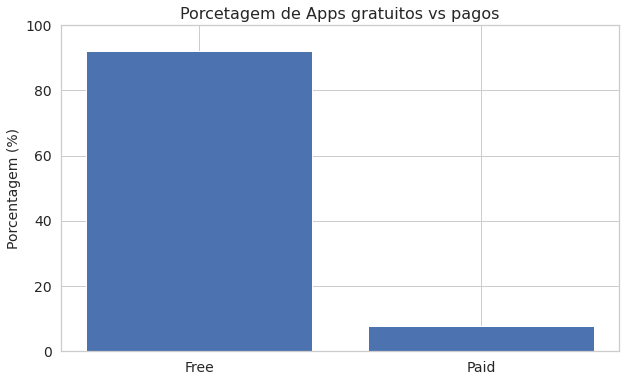

In [ ]:
plt.bar(df_plot.index, df_plot)
plt.ylabel("Porcentagem (%)")
plt.yticks(np.arange(0, 101, 20))
plt.title('Porcetagem de Apps gratuitos vs pagos')
plt.show()

De fato, `92%` dos aplicativos são gratuitos. Então vamos analisar média de preços do aplicativos pagos.

**BOXPLOT**

In [ ]:
cond = df['Type'] == "Paid"
df_paid_apps = df[cond].copy()
df_paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Current Ver,Android Ver,First_Genre,Sec_Genre
233,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442.0,6800000.0,100000,Paid,4.99,Everyone,2018-03-25,1.5.2,4.0 and up,Business,Business
234,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295.0,39000000.0,100000,Paid,4.99,Everyone,2017-04-11,3.4.6,3.0 and up,Business,Business
372,Puffin Browser Pro,COMMUNICATION,4.0,18247.0,NaN,100000,Paid,3.99,Everyone,2018-07-05,7.5.3.20547,4.1 and up,Communication,Communication
406,"Moco+ - Chat, Meet People",DATING,4.2,1545.0,NaN,10000,Paid,3.99,Mature 17+,2018-06-19,2.6.139,4.1 and up,Dating,Dating
407,Calculator,DATING,2.6,57.0,6200000.0,1000,Paid,6.99,Everyone,2017-10-25,1.1.6,4.0 and up,Dating,Dating


In [ ]:
df_paid_apps['Price'].describe()

count    756.000000
mean      14.045146
std       58.743615
min        0.990000
25%        1.490000
50%        2.990000
75%        4.990000
max      400.000000
Name: Price, dtype: float64

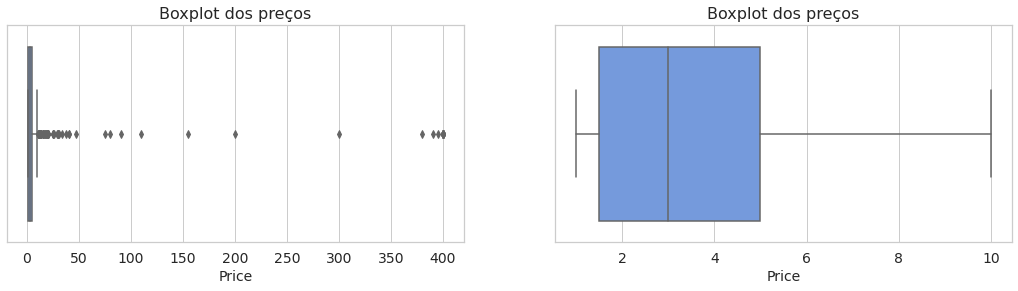

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2,  figsize = (18, 4))
sns.boxplot(data=df_paid_apps, x='Price', color=base_color, ax=ax1)
sns.boxplot(data=df_paid_apps, x='Price', color=base_color, ax=ax2, showfliers=False)
ax1.set_title('Boxplot dos preços')
ax2.set_title('Boxplot dos preços')
plt.show()

In [ ]:
Q1 = df_paid_apps['Price'].quantile(0.25)
Q3 = df_paid_apps['Price'].quantile(0.75)
IQR = Q3 - Q1 #Inter Quantile Range
print(f'Q1: {Q1} \n'
      f'Q3: {Q3} \n'
      f'IQR: {IQR} ')

Q1: 1.49 
Q3: 4.99 
IQR: 3.5 


Pode-se visualizar que `50%` dos apps possuem preços entre entre $1.49 (Q1) e 4.99 (Q3).

**HISTOGRAMA**

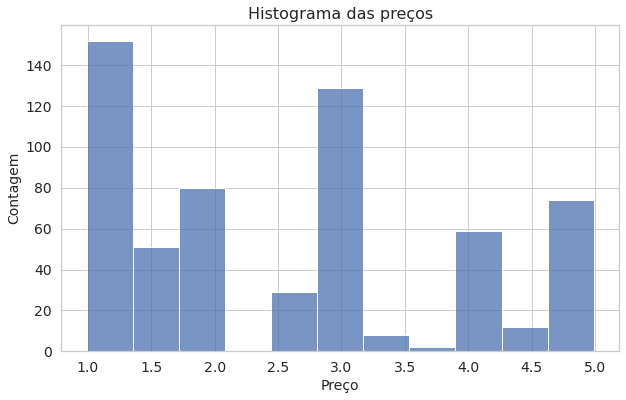

In [ ]:
cond = df['Price'] <= Q3
sns.histplot(df_paid_apps.loc[cond, 'Price'])
plt.xlabel('Preço')
plt.ylabel('Contagem')
plt.title('Histograma das preços')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   float64
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9659 non-null   float64
 8   Content Rating  9659 non-null   object 
 9   Last Updated    9659 non-null   object 
 10  Current Ver     9659 non-null   object 
 11  Android Ver     9657 non-null   object 
 12  First_Genre     9659 non-null   object 
 13  Sec_Genre       9659 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 1.0+ MB


### 2.1.2 Varáveis categóricas

### INSTALLS
Embora tenha domínio inteiro, podemos considerar essa variável categórica, pois possui apenas 20 valores únicos

In [ ]:
df['Installs'].unique()

O gráfico de barras é comumente o mais usado para visualizar variáveis categóricas. <br/>
`sns.countplot()`

In [ ]:
sns.countplot(y = 'Installs', data = df, color=base_color, order = df['Installs'].value_counts().index)
plt.title('Número de instalações')
plt.xlabel('Contagem')
plt.ylabel('Instalações')
plt.show()

**Qual o percentual de apps que possuem mais de 1e+6 instalações?**

In [ ]:
apps_installs_percent = (df.query('Installs >= 1e+6').shape[0] / df.shape[0]) * 100
print(f'{apps_installs_percent:.2f} % dos apps de nossa base de dados possuem mais de 1e+6 de instalações')

**Quais são os 10 apps mais baixados?**

In [ ]:
top10_apps = df.sort_values(by='Installs', ascending=False).head(10)
top10_apps[['App', 'Rating', 'Installs']]

In [ ]:
df.query('Installs == 1000000000').shape[0]

Existem de 20 apps com 1B de instalações. Depois vamos considerar mais uma variável (Rating) para refazer essa análise. 

### CATEGORY

In [ ]:
df['Category'].unique()

In [ ]:
plt.figure(figsize=(12,7))
order = df['Category'].value_counts().index
sns.countplot(y = 'Category', data = df, color=base_color, order = order)
plt.title('Número de apps por categoria')
plt.xlabel('Contagem')
plt.ylabel('Categoria')
plt.yticks(size=10)
plt.show()

In [ ]:
df.query('Category == "FAMILY"').head(10)

In [ ]:
df.info()

### CONTENT RATING

In [ ]:
df['Content Rating'].unique()

In [ ]:
df_plot = df['Content Rating'].value_counts()
df_plot = (df_plot / df_plot.sum()) * 100
df_plot

In [ ]:
plt.barh(df_plot.index, df_plot)
plt.xlabel("Porcentagem (%)")
plt.xticks(np.arange(0, 101, 20))
plt.title('Porcetagem de Apps por classificação de conteúdo')
plt.show()

In [ ]:
df.info()

### ANDROID VER

In [ ]:
df['Android Ver'].unique()

In [ ]:
plt.figure(figsize=(12,7))
order = df['Android Ver'].value_counts().index
sns.countplot(y = 'Android Ver', data = df, color=base_color, order = order)
plt.title('Número de apps por versão do android')
plt.xlabel('Contagem')
plt.ylabel('Android Ver')
plt.yticks(size=10)
plt.show()

In [ ]:
df['Android Ver'].value_counts()

In [ ]:
cond = df['Android Ver'] == "2.2 - 7.1.1" 
df[cond]

Talvez seja necessário pesquisar mais a respeito das versões do android para identifar possíveis erros de versão.

### FIRST_GENRE

In [ ]:
df['First_Genre'].unique()

In [ ]:
plt.figure(figsize=(12,7))
order = df['First_Genre'].value_counts().index
sns.countplot(y = 'First_Genre', data = df, color=base_color, order = order)
plt.title('Número de apps por First_Genre')
plt.xlabel('Contagem')
plt.ylabel('First_Genre')
plt.yticks(size=10)
plt.show()

## 2.2 Análise Bivariada

- Usaremos a análise bivariada para encontrar relações entre duas variáveis.
- Para análise bivariada, geralmente usamos boxplot (categórico versus numérico), gráfico de dispersão (numérico versus numérico) ou tabela de contingência (categórico versus categórico).

### CATEGORY vs RATING

**Quais categorias são melhorres avaliadas?**

In [ ]:
stats = df.groupby('Category').describe()['Rating'].sort_values(by='mean', ascending=False)
stats

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
EVENTS,45.0,4.435556,0.419499,2.9,4.200,4.5,4.700,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
PERSONALIZATION,298.0,4.332215,0.358968,2.5,4.200,4.4,4.600,5.0
PARENTING,50.0,4.300000,0.517845,2.0,4.100,4.4,4.675,5.0
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
GAME,912.0,4.247368,0.384116,1.0,4.100,4.3,4.500,5.0
SOCIAL,203.0,4.247291,0.457209,1.9,4.100,4.3,4.500,5.0


Vamos considerar que as melhores categorias são aquelas que possuem as maiores **médias**.

Ao computar a _média das avaliações por categoria_ e ordenar pela **maior média**, constatamos que a categoria "EVENTS" possui a maior média. <br/>
Mas, **não** é possível afirmar que essa é a _categoria melhor avaliada **apenas olhando para estes resultados**_, pois **o tamanho de cada amostra/grupo** (i.e., a quantidade de aplicativos por categoria) é diferente. Além disso, o **desvio padrão** também muda de categoria para categoria.<br/>

P. ex., a categoria "EVENTS" possui 45 apps, enquanto "BOOKS_AND_REFERENCE" possui 169.

Precisaríamos rodar algum **teste estatístico específico**, p. ex., para ter essa certeza. <br/>

Por ora, vamos simplificar e assumir que apenas analisar esses resultados é suficiente para decidirmos quais são as categorias melhores avaliadas.

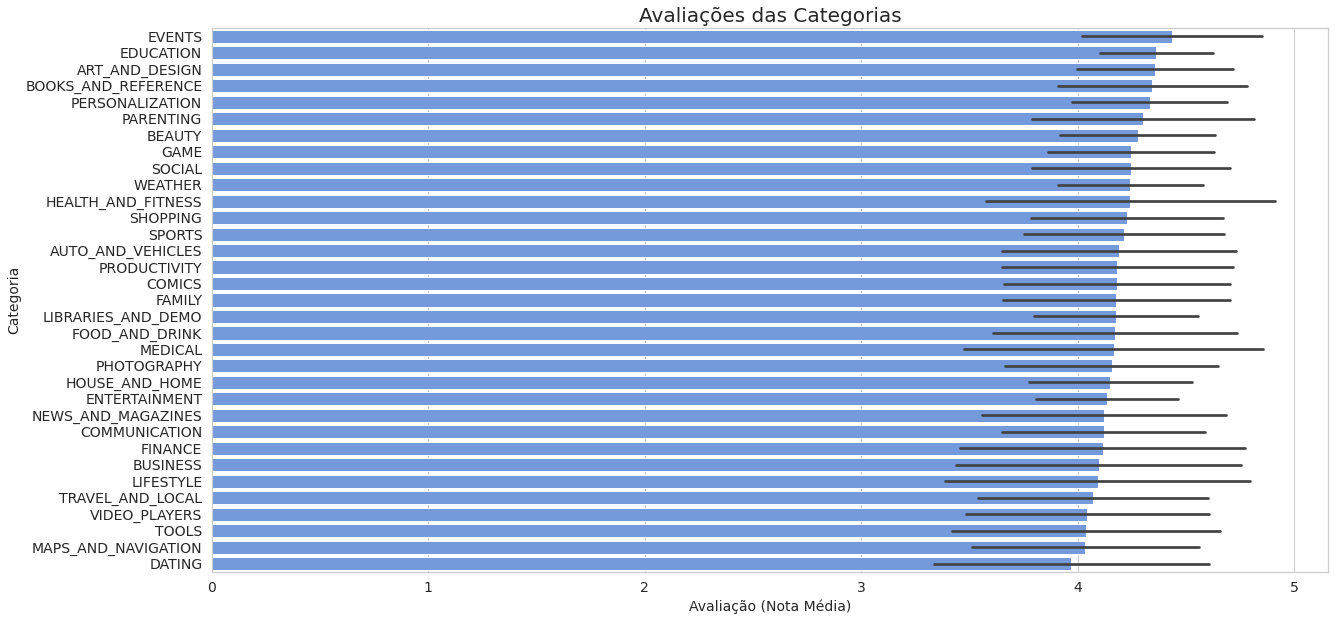

In [ ]:
plt.figure(figsize=(20,10))
order = stats.sort_values(by='mean', ascending=False).index
# topo de cada barra mostra a média das avaliações para cada categoria
# o risco no topo da barra indica seu respectivo desvio padrão (parâmetro ci='sd')
sns.barplot(data=df, x='Rating', y='Category', ci='sd', color = base_color, order = order)
plt.xlabel('Avaliação (Nota Média)')
plt.ylabel('Categoria')
plt.title('Avaliações das Categorias', fontsize=20)
plt.show()

Ao analisar o boxplot, podemos nota que algumas categorias (p.ex., 'HEALTH_AND_FITNESS') possuem um **desvio padrão** um pouco maior do que as demais categorias. <br/>
Vamos dar uma olhada na distribuição das notas de uma dessas categorias apenas para ter um sentimento do que está acontecendo.

In [ ]:
### Vamos analisar a categoria HELATH_AND_FITNESS, pq ela tem um std grande (caso específico)
sns.boxplot(data=df.query('Category == "HEALTH_AND_FITNESS"'), x='Rating', color=base_color)
plt.show()

**Como as avaliações se distribuem em cada categoria?**

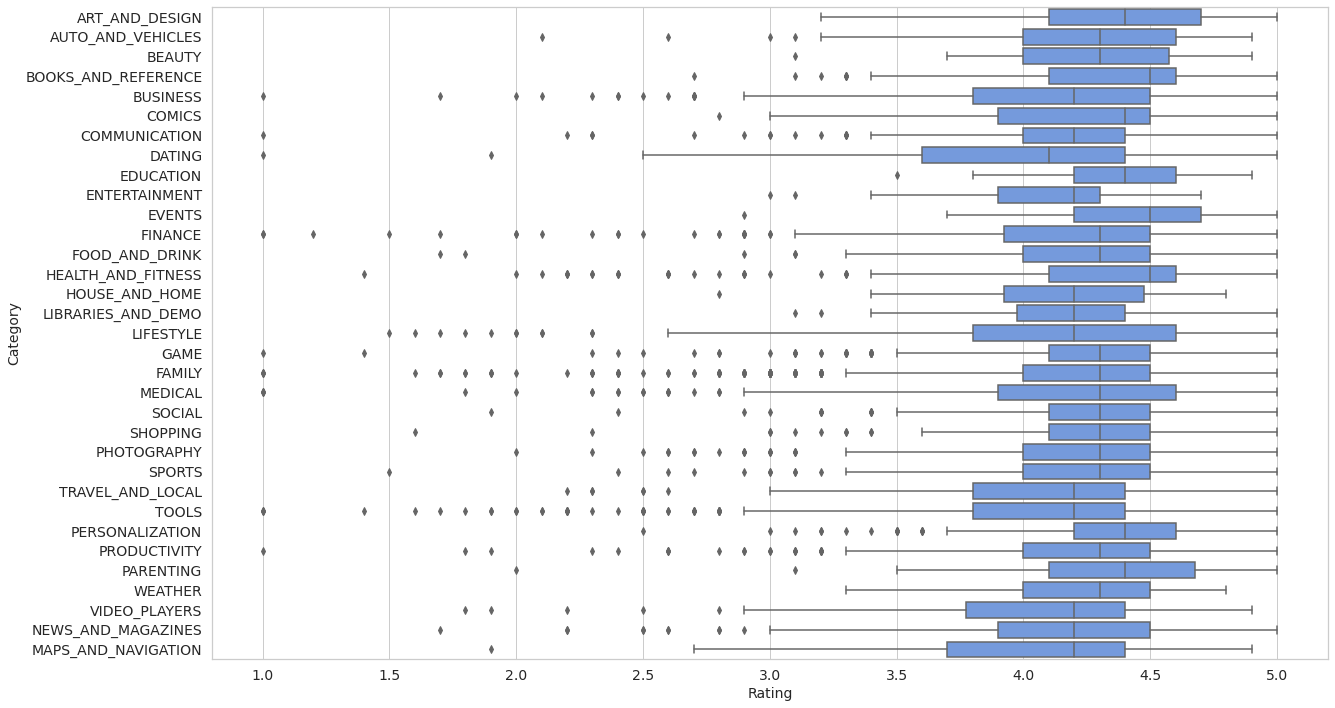

In [ ]:
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='Rating', y='Category', color = base_color)
plt.show()

Para obter uma análise visual mais interessante, podemos ordenar os boxplots (ou violion plots) de acordo com algum critério. <br/>
Por exemplo, podemos ordená-los pela _mediana_ de cada categoria a fim de analisar, p. ex., como estão distribuídos _a metade dos apps mais bem avaliados_ de cada categoria, além de **diminuir o impacto de outliers** na distribuição.

In [ ]:
# ordenando pela mediana
order = stats.sort_values(by='50%').index
plt.figure(figsize=(20, 12))
sns.boxplot(data=df, x='Rating', y='Category', order=order, color=base_color)
plt.show()

Ao analisar os boxplots, vemos que as categorias *BOOKS_AND_REFERENCE* e *HEALTH_AND_FITNESS* possuem uma quantidade considerável de apps muito bem avaliados --- ~50% de seus apps possuem avaliação >- 4.5. Entretanto, a **variância** (dispersão) de suas avaliações é **muito alta**, vários _outliers_. <br/>

Vamos agora analisar o mesmo gráfico mas com as categorias organizadas pela **média** das avaliações.

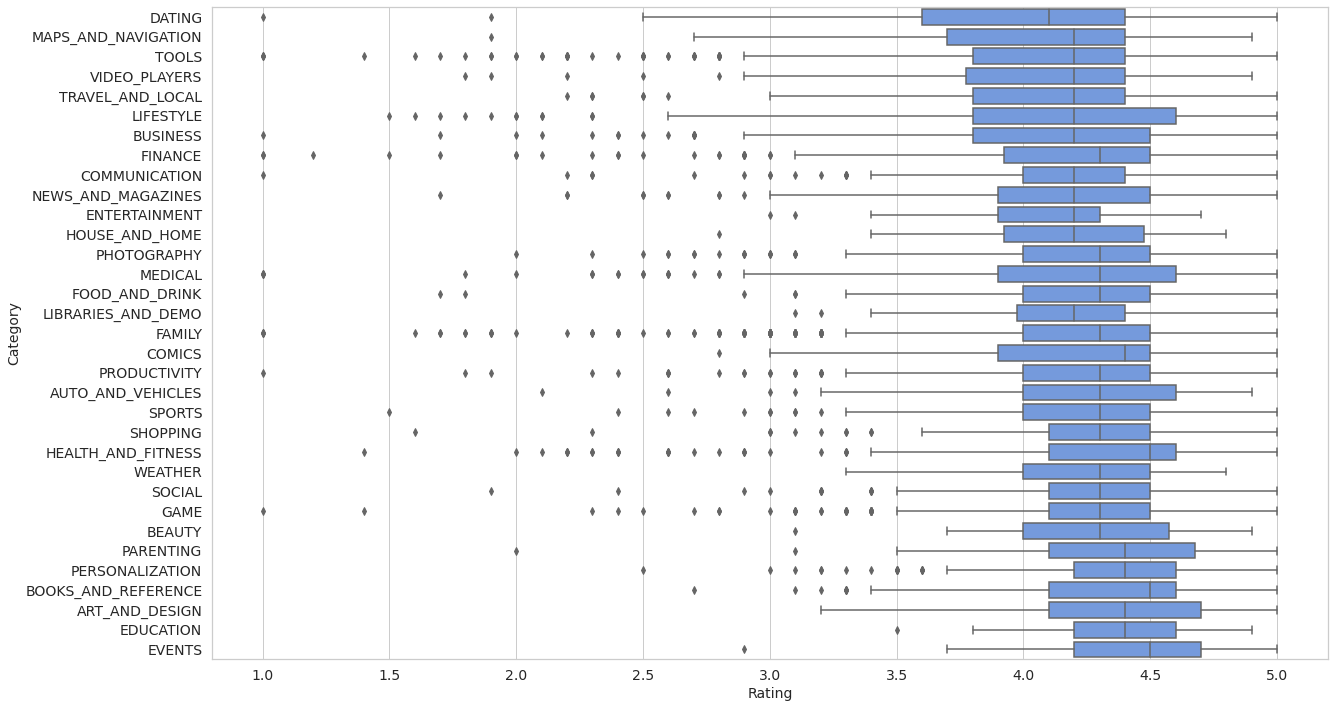

In [ ]:
# ordenando pela média
order = stats.sort_values(by='mean').index

plt.figure(figsize=(20, 12))
sns.boxplot(x='Rating', y='Category', data=df, order=order, color=base_color)
plt.show()

Note que como a **média** é _sensível a outliers_, as categorias 'BOOKS_AND_REFERENCES_ e, principalmente, 'HEALTH_AND_FITNESS_ perderam posições. Categorias bem avaliadas e com poucos outliers (p. ex., 'EDUCATION' e 'EVENTS') apresentam médias maiores.

Em resumo, esta maneira de organizar e visualizar este gráfico é interessante quando você quer considerar o impacto dos outliers da variável analisada. A visualização anterior, ordenando pelas medianas, visa o oposto.

### CATEGORY vs REVIEWS

**Quais categorias recebem mais comentários?**

In [7]:
topreview = df.groupby(['Category'])['Reviews'].sum().sort_values(ascending=False)
topreview

Category
GAME                   622298709.0
COMMUNICATION          285811368.0
TOOLS                  229356578.0
SOCIAL                 227927801.0
FAMILY                 143825488.0
PHOTOGRAPHY            105351270.0
VIDEO_PLAYERS           67484568.0
PRODUCTIVITY            55590649.0
PERSONALIZATION         53543080.0
SHOPPING                44551730.0
SPORTS                  35348813.0
ENTERTAINMENT           34762650.0
TRAVEL_AND_LOCAL        26819741.0
NEWS_AND_MAGAZINES      23130228.0
HEALTH_AND_FITNESS      21361355.0
MAPS_AND_NAVIGATION     17729148.0
BOOKS_AND_REFERENCE     16721314.0
EDUCATION               13364148.0
FINANCE                 12662106.0
WEATHER                 12295164.0
LIFESTYLE               11832671.0
BUSINESS                 9890245.0
FOOD_AND_DRINK           6325028.0
DATING                   3623544.0
COMICS                   2342071.0
HOUSE_AND_HOME           1929847.0
ART_AND_DESIGN           1419203.0
MEDICAL                  1182971.0
AUTO_AND_VE

### CATEGORY vs INSTALLS

**Quais categorias possuem mais downloads?**

In [8]:
topdownload = df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
topdownload

Category
GAME                   13878924415
COMMUNICATION          11038276251
TOOLS                   8001771915
PRODUCTIVITY            5793091369
SOCIAL                  5487867902
PHOTOGRAPHY             4649147655
FAMILY                  4427941505
VIDEO_PLAYERS           3926902720
TRAVEL_AND_LOCAL        2894887146
NEWS_AND_MAGAZINES      2369217760
ENTERTAINMENT           2113660000
BOOKS_AND_REFERENCE     1665969576
PERSONALIZATION         1532494782
SHOPPING                1400348785
HEALTH_AND_FITNESS      1144022512
SPORTS                  1096474498
BUSINESS                 697164865
LIFESTYLE                503823539
MAPS_AND_NAVIGATION      503281890
FINANCE                  455348734
WEATHER                  361100520
EDUCATION                352952000
FOOD_AND_DRINK           211798751
DATING                   140926107
ART_AND_DESIGN           114338100
HOUSE_AND_HOME            97212461
AUTO_AND_VEHICLES         53130211
LIBRARIES_AND_DEMO        52995910
COMICS     

`Conside que o app mais popular é o mais baixado e que possui a melhor avaliação (rating)`. </br>
**Neste contexto, mostre quais são os 10 apps mais populares**.

In [11]:
topdownloadapp = df.groupby(['App'])['Installs'].sum().sort_values(ascending=False)
topdownloadapp


App
Google Photos                1000000000
Google+                      1000000000
Google Drive                 1000000000
Gmail                        1000000000
Google News                  1000000000
                                ...    
EG | Explore Folegandros              0
Sweden Newspapers                     0
AP Series Solution Pro                0
Eu Sou Rico                           0
Command & Conquer: Rivals             0
Name: Installs, Length: 9659, dtype: int64

In [12]:
topratingapp = df.groupby(['App'])['Rating'].sum().sort_values(ascending=False)
topratingapp


App
Comunidad De Fe Minitries                           5.0
Tablet Reminder                                     5.0
Noticias FC Barcelona                               5.0
Superheroes, Marvel, DC, Comics, TV, Movies News    5.0
DC N COMPANY ENTERTAINMENT RADIO!                   5.0
                                                   ... 
DK Childcare Centers                                0.0
Pediatric Emergency Guide                           0.0
Pekalongan CJ                                       0.0
Penn State Health OnDemand                          0.0
"i DT" Fútbol. Todos Somos Técnicos.                0.0
Name: Rating, Length: 9659, dtype: float64

**Pesquise e apresente uma forma mostrar quais os termos(palavras) mais usadas em nomes de apps.**

In [21]:
import pandas as pd
import nltk
import re
import string
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
dt = df['App']

from collections import Counter
p = Counter(" ".join(dt).split()).most_common(10)
rslt = pd.DataFrame(p, columns=['Word', 'Frequency'])
print(rslt)

     Word  Frequency
0       -       1375
1       &        694
2     for        452
3    Free        297
4     and        237
5     App        209
6  Mobile        185
7     Pro        154
8     The        144
9      of        133
